In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [10]:
#Data Analytics Concept with Linear regression with the given data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sea

In [11]:
%matplotlib inline

In [3]:
df = pd.read_excel('/Users/yachu/Downloads/Excel_sample_2.xlsx', sheet_name= 'Insurance')

In [4]:
print(df.head)

<bound method NDFrame.head of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>


In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


/Users/yachu/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


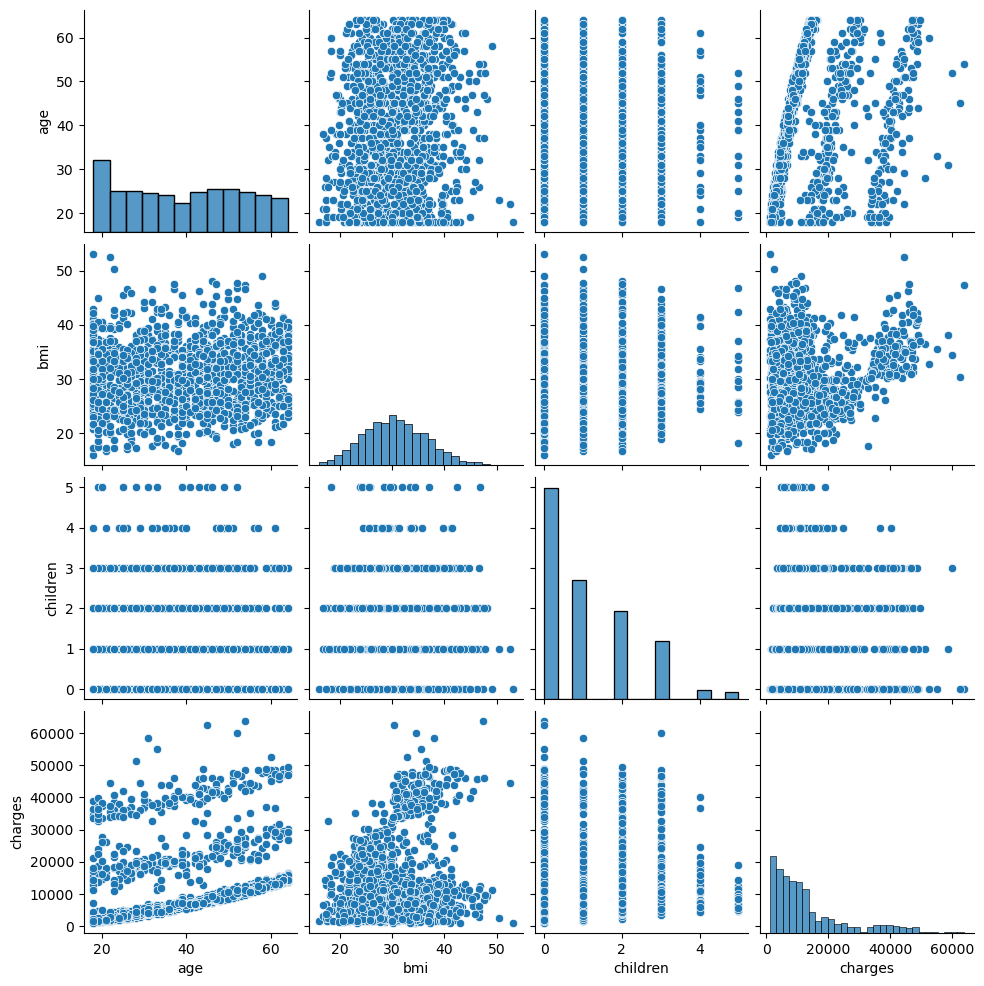

In [12]:
# Seaborn package Dataframe
sea.pairplot(df)

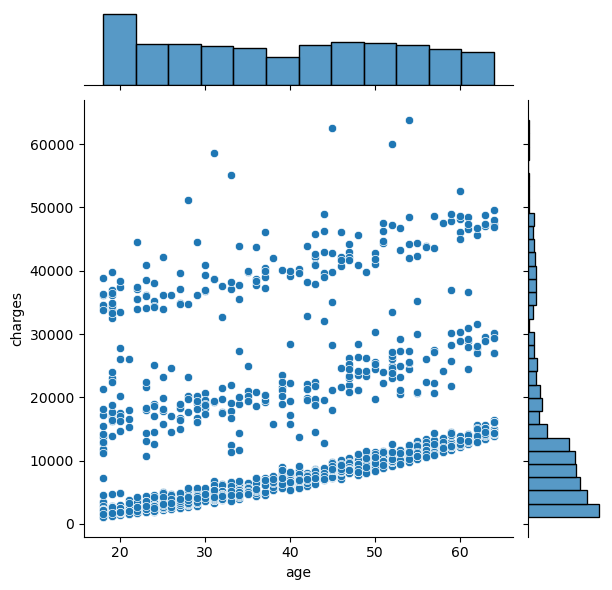

In [13]:
sea.jointplot(x = 'age', y = 'charges', data = df, kind = 'scatter')

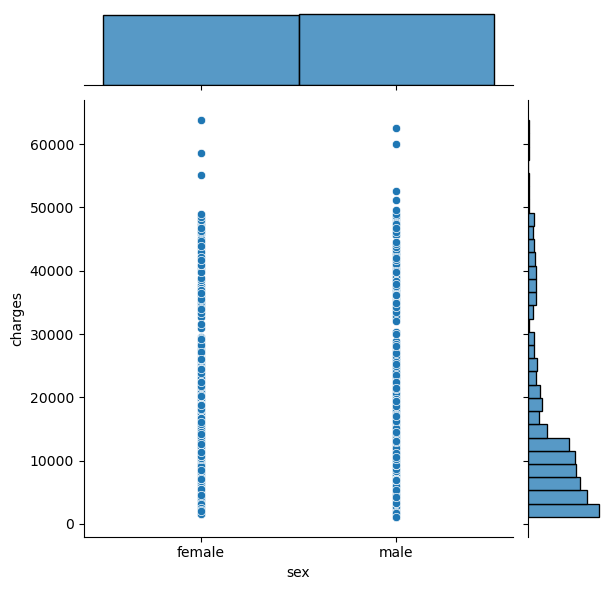

In [14]:
sea.jointplot(x = 'sex', y = 'charges', data = df, kind = 'scatter')

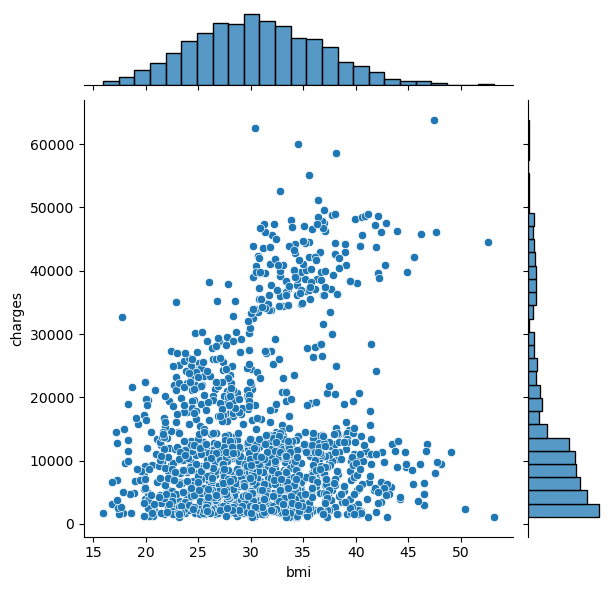

In [15]:
sea.jointplot(x = 'bmi', y = 'charges', data = df, kind = 'scatter')

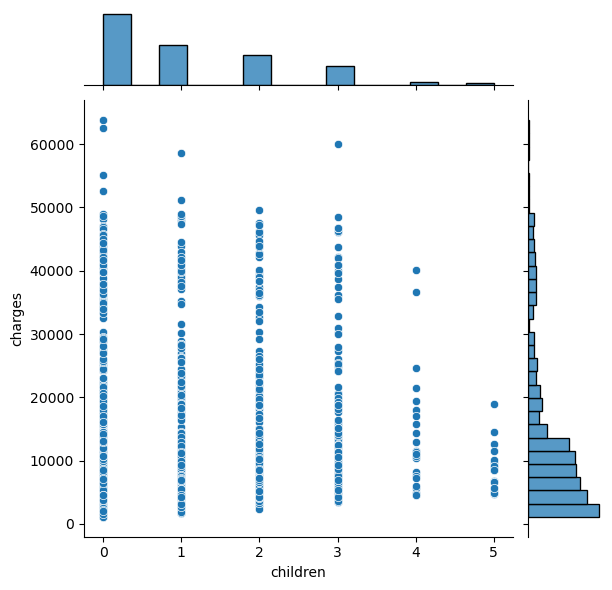

In [16]:
sea.jointplot(x = 'children', y = 'charges', data = df, kind = 'scatter')

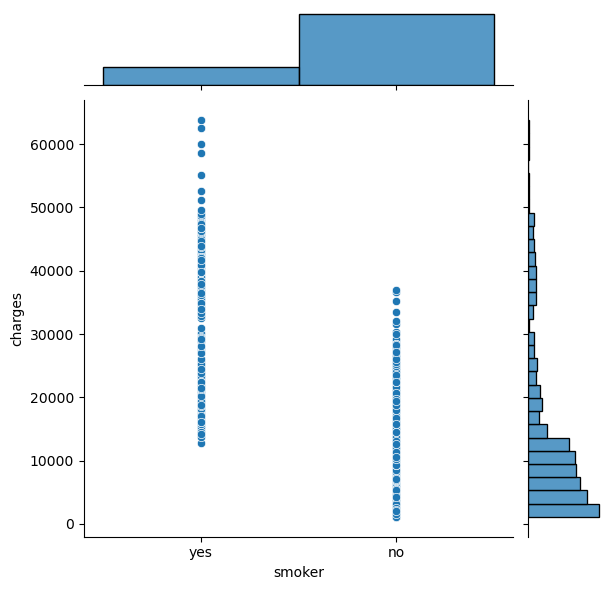

In [17]:
sea.jointplot(x = 'smoker', y = 'charges', data = df, kind = 'scatter')

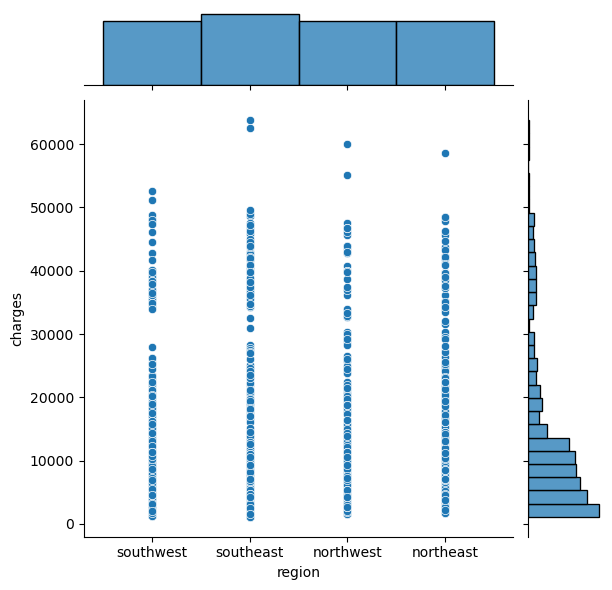

In [18]:
sea.jointplot(x = 'region', y = 'charges', data = df, kind = 'scatter')

<Axes: xlabel='bmi', ylabel='charges'>

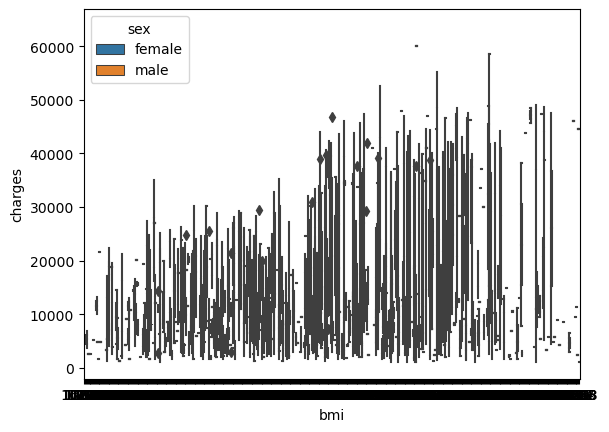

In [19]:
# Boxplot
sea.boxplot(x = 'bmi', y = 'charges', hue = 'sex', data = df)

In [20]:
df_sex = pd.get_dummies(df['sex'], prefix = 'sex')  #As a part of including all non numeric values so we have create binary type like true or false, 1 or 0

In [21]:
df_sex.head()

,sex_female,sex_male
0,True,False
1,False,True
2,False,True
3,False,True
4,False,True


In [22]:
df_smoker = pd.get_dummies(df['smoker'], prefix='smoker')

In [23]:
df_smoker.head()

,smoker_no,smoker_yes
0,False,True
1,True,False
2,True,False
3,True,False
4,True,False


In [24]:
df_region = pd.get_dummies(df['region'], prefix='region')

In [25]:
df_region.head()

,region_northeast,region_northwest,region_southeast,region_southwest
0,False,False,False,True
1,False,False,True,False
2,False,False,True,False
3,False,True,False,False
4,False,True,False,False


In [31]:
df_new = pd.concat([df, df_sex, df_smoker, df_region], axis = 1)

In [32]:
print(df_new)

      age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

      sex_female  sex_male  smoker_no  smoker_yes  region_northeast  \
0           True     False      False        True             False   
1          False 

In [33]:
df_new = df_new.drop(['sex', 'smoker', 'region'], axis = 1)

In [34]:
print(df_new)

      age     bmi  children      charges  sex_female  sex_male  smoker_no  \
0      19  27.900         0  16884.92400        True     False      False   
1      18  33.770         1   1725.55230       False      True       True   
2      28  33.000         3   4449.46200       False      True       True   
3      33  22.705         0  21984.47061       False      True       True   
4      32  28.880         0   3866.85520       False      True       True   
...   ...     ...       ...          ...         ...       ...        ...   
1333   50  30.970         3  10600.54830       False      True       True   
1334   18  31.920         0   2205.98080        True     False       True   
1335   18  36.850         0   1629.83350        True     False       True   
1336   21  25.800         0   2007.94500        True     False       True   
1337   61  29.070         0  29141.36030        True     False      False   

      smoker_yes  region_northeast  region_northwest  region_southeast  \
0

In [35]:
X = df_new.drop(['charges'], axis = 1)

In [36]:
print(X)

      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
0      19  27.900         0        True     False      False        True   
1      18  33.770         1       False      True       True       False   
2      28  33.000         3       False      True       True       False   
3      33  22.705         0       False      True       True       False   
4      32  28.880         0       False      True       True       False   
...   ...     ...       ...         ...       ...        ...         ...   
1333   50  30.970         3       False      True       True       False   
1334   18  31.920         0        True     False       True       False   
1335   18  36.850         0        True     False       True       False   
1336   21  25.800         0        True     False       True       False   
1337   61  29.070         0        True     False      False        True   

      region_northeast  region_northwest  region_southeast  region_southwest  
0       

In [37]:
y = df['charges']

In [38]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [40]:
#Defining function of X,y train and test ratio Data split of X input and Y input
def data_split(X_input, y_input, split_ratio):
    X_train, X_test, y_train, y_test = train_test_split(X_input, y_input, test_size=split_ratio, random_state=10)
    return X_train, X_test, y_train, y_test

In [46]:
def built_linear_model(X_train_input, y_train_input):   #Declaring the function
    lr = LinearRegression()  #Initializes the linear regression from import model
    lr.fit(X_train, y_train)
    coef=lr.coef_  #Coefficient
    #dictionary = {X_train_input.columns[i] : lr.coef_[i] for i in range (len(X_train_input.columns))}# Dictionary as asked in the question in the format of dictionary
    print(lr.coef_) #Print the coefficients
    print(lr.intercept_)  #Print the intercept
   # print(dictionary)  #Print the dictionary
    return lr   #Return the function

In [47]:
def evaluate_linear_model(X_test_input, y_test_input, lr_input):  #As X is independent variable and y is dependent variable we are defining the function
    y_pred = lr_input.predict(X_test_input) #Prediction results
    plt.scatter(y_test_input, y_pred)   #Plot the scatter graph
    absolute_error=metrics.mean_absolute_error(y_test_input, y_pred)  #Calculate the absolute error
    squared_error=metrics.mean_squared_error(y_test_input, y_pred)      #Calculate the squared error
    root=np.sqrt(metrics.mean_squared_error(y_test_input, y_pred))     #Calculate the root mean squared error
    
    print("Absolute Error is ",absolute_error)  #Print all these values 
    print("Squared error",squared_error)
    print("Root Error",root)
    

In [48]:
X_train, X_test, y_train, y_test = data_split(X, y, 0.2) 

In [49]:
model_values = built_linear_model(X_train, y_train)

[   259.54736297    353.03769217    543.28925423    127.19881786
   -127.19881786 -12062.05468851  12062.05468851    426.60645499
    234.60398263   -469.52714954   -191.68328808]
-1209.3247516212923


Absolute Error is  4555.0985825133685
Squared error 42730364.68387246
Root Error 6536.846692700729


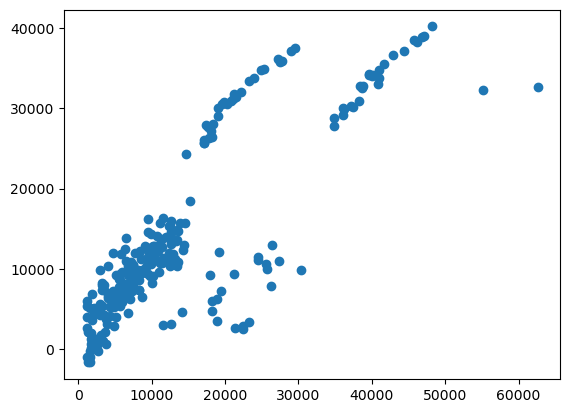

In [50]:
evaluate_linear_model(X_test, y_test, model_values)